<a href="https://colab.research.google.com/github/xukanz/Mars-Craters/blob/main/robbins_to_themis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/liyinze1/Robbins-to-THEMIS.git

Cloning into 'Robbins-to-THEMIS'...
remote: Enumerating objects: 417, done.
remote: Total 417 (delta 0), reused 0 (delta 0), pack-reused 417
Receiving objects: 100% (417/417), 23.63 MiB | 16.09 MiB/s, done.
Resolving deltas: 100% (253/253), done.


In [ ]:
pip install -r Robbins-to-THEMIS/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python Robbins-to-THEMIS/download.py 

--2022-07-20 18:10:35--  https://planetarymaps.usgs.gov/mosaic/Mars/THEMIS_controlled_mosaics/Amenthes_DayIR_15April2016/THEMIS_DayIR_ControlledMosaic_Amenthes_000N090E_100mpp.tif
Resolving planetarymaps.usgs.gov (planetarymaps.usgs.gov)... 66.85.141.154
Connecting to planetarymaps.usgs.gov (planetarymaps.usgs.gov)|66.85.141.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 474504416 (453M) [image/tiff]
Saving to: ‘raw_images/THEMIS_DayIR_ControlledMosaic_Amenthes_000N090E_100mpp.tif’

THEMIS_DayIR_Contro 100%[===================>] 452.52M  50.8MB/s    in 9.3s    

2022-07-20 18:10:44 (48.6 MB/s) - ‘raw_images/THEMIS_DayIR_ControlledMosaic_Amenthes_000N090E_100mpp.tif’ saved [474504416/474504416]

--2022-07-20 18:10:44--  https://planetarymaps.usgs.gov/mosaic/Mars/THEMIS_controlled_mosaics/Memnonia_DayIR_15April2016/THEMIS_DayIR_ControlledMosaic_Memnonia_30S180E_100mpp.tif
Resolving planetarymaps.usgs.gov (planetarymaps.usgs.gov)... 66.85.141.154
Connecting 

In [ ]:
!cd Robbins-to-THEMIS && python map.py 

Namespace(dataset='dataset', inbox_threshold=0.5, lat=90, no_label=False, scale=1.0, threads=6)
--------0/27---------

slicing raw_images/THEMIS_DayIR_ControlledMosaic_Elysium_00N135E_100mpp.tif
------------------------------
image_size  (17783, 26674)
lat_range [0, 30]
lon_range [135, 180]

  0%|                                                                         | 0/5 [00:00<?, ?it/s]

  0%|                                                                         | 0/5 [00:00<?, ?it/s]


  0%|                                                                         | 0/5 [00:00<?, ?it/s]




  0%|                                                                         | 0/5 [00:00<?, ?it/s]



  0%|                                                                         | 0/5 [00:00<?, ?it/s]


 20%|█████████████                                                    | 1/5 [00:08<00:35,  8.78s/it]

 20%|█████████████                                                    | 1/5 [00:09<00:36

In [ ]:
mkdir Robbins-to-THEMIS/output

593 593
491 542 16 68 07-0-00112


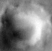

106 331 37 265 07-0-00114


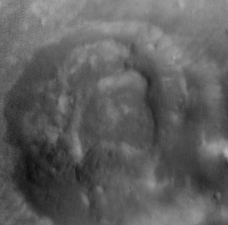

269 350 218 301 07-0-00115


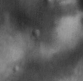

470 593 213 414 07-0-00116


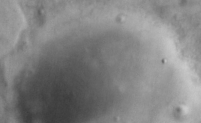

139 421 422 593 07-0-00117


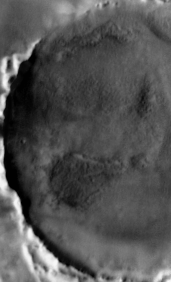

531 545 572 588 07-1-00884


410 427 400 420 07-1-00885


153 169 403 421 07-1-00886


81 117 490 526 07-1-00891


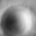

23 44 525 546 07-2-00142


286 345 469 529 07-3-00022


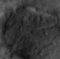

312 324 375 388 07-3-00023


113 127 421 437 07-4-00842


453 466 211 224 07-4-02320


574 585 386 399 07-4-02321


In [ ]:
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import os
from google.colab import files

def get_crater_image(image,data):
  
  df = pd.read_csv(data, sep=' ', names=['None','lat','lon','w','h','id'])
  img = cv2.imread(image)
  reso_x=img.shape[0]
  reso_y=img.shape[1]
  print(reso_x,reso_y)
  dirpath=os.path.join('Robbins-to-THEMIS/output/', image[33:-4])
  #os.mkdir(dirpath)
  #print("T", image,data)
  for index, row in df.iterrows():
      x,y,w,h,id = float(row['lat'])*reso_x,float(row['lon'])*reso_y,float(row['w'])*reso_x,float(row['h'])*reso_y,row['id']
      try:
        crop_img = img[max(0,round(y-h/2)):min(reso_y,round(y+h/2)),max(0,round(x-w/2)):min(reso_x,round(x+w/2))]
        print(max(0,round(y-h/2)),min(reso_y,round(y+h/2)),max(0,round(x-w/2)),min(reso_x,round(x+w/2)),id)
        cv2_imshow(crop_img)
        #cv2.imwrite(dirpath+"/"+id+".png", crop_img)
      except TypeError as e:
        print(image,data)
        break
  
get_crater_image("Robbins-to-THEMIS/dataset/images/-1_-1.png","Robbins-to-THEMIS/dataset/labels/-1_-1.txt")                  




In [ ]:
def get_crater_image(image,data):
  
  df = pd.read_csv(data, sep=' ', names=['None','lat','lon','w','h','id'])
  img = cv2.imread(image)
  reso_x=img.shape[0]
  reso_y=img.shape[1]
  print(reso_x,reso_y)
  dirpath=os.path.join('Robbins-to-THEMIS/output/', image[33:-4])
  os.mkdir(dirpath)
  #print("T", image,data)
  for index, row in df.iterrows():
      x,y,w,h,id = float(row['lat'])*reso_x,float(row['lon'])*reso_y,float(row['w'])*reso_x,float(row['h'])*reso_y,row['id']
      try:
        crop_img = img[max(0,round(y-h/2)):min(reso_y,round(y+h/2)),max(0,round(x-w/2)):min(reso_x,round(x+w/2))]
        #print(max(0,round(y-h/2)),min(reso_y,round(y+h/2)),max(0,round(x-w/2)),min(reso_x,round(x+w/2)),id)
        #cv2_imshow(crop_img)
        cv2.imwrite(dirpath+"/"+id+".png", crop_img)
      except TypeError as e:
        print(image,data)
        break
  
get_crater_image("Robbins-to-THEMIS/dataset/images/-1_-1.png","Robbins-to-THEMIS/dataset/labels/-1_-1.txt")                  



593 593
